### Тематическое моделирование 



__Важно__: Во второй половине ноутбука мы будем работать с библиотекой BigARTM, запускать которую локально удобнее всего с помощью Docker-образа (или попробовать поставиьт библиотеку согласно инструкции по ссылке ниже, но это не всегда удается с первого раза). Если вы планируете работать с использованием Docker, сперва запустите его и работайте с ноутбуком внутри окружения, чтобы не делать предобработку данных дважды. Инструкция ниже.


Есть несколько сценариев работы с BigARTM, среди которых:

- установка библиотеки для Питона: инструкция [здесь] (кстати, легко установить через pip install в Google colab) (https://bigartm.readthedocs.io/en/stable/installation/index.html)

- запуск Docker образа с библиотекой

Если вы предпочтете второй сценарий, вам нужно:
1. Скачать и установить [Docker](https://www.docker.com/get-started) для своей ОС. Запустить Docker. 
2. Скачать образ (Dockerfile), в котором устанавливается большинство библиотек для анализа данных, Jupyter Notebook и сама BigARTM. Ссылка на файл лежит рядом со ссылкой на этот ноутбук в материалах недели.
3. Собрать образ: это можно сделать через командную строку (находясь в папке, где лежит скачанный в п.2 Dockerfile):

После выполнения этих двух команд запустится Jupyter Notebook, в командной строке будет написан путь к нему в таком формате:

Откройте любой из URL, там поднят Jupyter Notebook с уже установленными библиотеками.

При работе не забывайте, что все ноутбуки, которые вы создаете внутри этого Docker образа, исчезнут, как только вы остановите Docker, поэтому перед окончанием работы скачайте ноутбук с результатом себе на компьютер.

In [ ]:
https://drive.google.com/file/d/1xZ4F3QYfEQnc62lr0iioWd7GJQTwsly8/view?usp=sharing

Построим тематические модели для корпуса новостей Lenta.ru, с которым мы уже работали ранее, добавим поля __date__ и __topic__.

In [6]:
# если у вас линукс / мак / collab или ещё какая-то среда, в которой работает wget, можно так:
#!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1-6Fl4aiag30z2BKqGlOgBVsBuexTi2_y' -O lenta_ru_sample.csv

--2021-09-30 22:40:11--  https://docs.google.com/uc?export=download&id=1xZ4F3QYfEQnc62lr0iioWd7GJQTwsly8
Распознаётся docs.google.com (docs.google.com)… 74.125.131.100, 74.125.131.102, 74.125.131.139, ...
Подключение к docs.google.com (docs.google.com)|74.125.131.100|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: нет данных [text/html]
Сохранение в: «lenta_ru_full.csv»

lenta_ru_full.csv       [ <=>                ]   3,20K  --.-KB/s    за 0s      

2021-09-30 22:40:11 (8,29 MB/s) - «lenta_ru_full.csv» сохранён [3278]



In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

data = pd.read_csv('lenta_ru_sample.csv', usecols=['text', 'topic',  'date']) # ограничим размер 50,000 строк
data.sample(3)

,text,topic,date
676,"Как заявил официальный представитель МИД РФ Владимир Рахманин, испытания противоракетной системы, проведенные в США 2 октября в рамках программы создания системы национальной противоракетной обороны, идет вразрез с Договором по ПРО от 1972 года, статья которого запрещает само создание основы для такой обороны. Баллистическая ракета ""Минитмен"" с учебной боеголовкой была запущена с базы ВВС США Ванденберг в штате Калифорния в сторону полигона на атолле Кваджалейн. Через 20 минут с Маршалловых островов с помощью ракеты-носителя был осуществлен запуск ""истребительного снаряда"". Они сошлись через 10 минут на высоте примерно в 225 км над Тихим океаном почти в 5 тысяч километров от берегов Калифорнии. Цель была уничтожена, причем совокупная скорость обеих ракет при столкновении составила свыше 25,6 тысяч километров в час. Рахманин подчеркнул, что такие действия со стороны США ведут к подрыву ключевых положений указанного Договора со всеми вытекающими отсюда негативными последствиями, ответственность за которые ляжет на Соединенные Штаты. Пентагон тем временем планирует провести еще два испытания ""истребительного снаряда"" перед тем, как в июне будет рассматриваться вопрос о степени готовности системы ПРО к дальнейшим работам по ее практической реализации.",Россия,1999/10/05
73,"Экипажи двух российских транспортных самолетов удерживаются повстанцами УНИТА в одном из районов центральной Анголы, передает ИТАР-ТАСС. Для их освобождения партизаны требуют приезда официального российского представителя. Об этом здесь сообщили французские корреспонденты, посетившие контролируемые повстанцами районы. Экипажи самолетов находятся в разных местах. Первый из них пилотировал ""Ан-26"", принадлежащий зарегистрированной в ЮАР компании ""Волга-Атлантик"". Самолет во главе с 39-летним Александром Зайцевым был сбит при взлете из расположенного на севере Анголы населенного пункта Лузамбо. Второй экипаж захвачен в пригородах провинциального центра Сауримо, на востоке страны. Как заявил его пилот, 57-летний Александр Юдов, они перевозили продовольствие и ящики с пивом для ангольской компании. По его словам, когда начался пожар, вызванный экстренным приземлением, бутылки стали взрываться, чтоповстанцы УНИТА восприняли как доказательство перевозки военных грузов. Партизаны открыли по горящему самолету огонь, убив штурмана. Погиб и боритнженер. Оставшиеся в живых три члена экипажа и двое бывших с ними на борту ""ангольских торговца"" попали в плен. Члены обоих экипажей находятся в ""хорошей физической и моральной форме"", получают ""должное питание и уход"". Все шестеро обратились через журналистов с призывом к правительству России ""сделать все необходимое, чтобы как можно быстрее вызволить их из плена"".",Мир,1999/09/03
27,"Касаясь на сегодняшней пресс-конференции обстановки в Дагестане, министр внутренних дел РФ Рушайло подчеркнул, что в настоящее время там осуществляется второй этап операции - антитеррористический. ""Ситуация нормальная, штатная, все идет по плану"", - сказал он. Подразделения объединенной группировки федеральных сил, сообщает ИТАР-ТАСС, завершили перегруппировку и полностью замкнули кольцо окружения вокруг бандформирований религиозных экстремистов в так называемом Кадарском анклаве в Дагестане. Бои с исламистами в районе дагестанских сел Карамахи и Чабанмахи принимают всё более ожесточенный характер и федеральные силы несут ощутимые потери. Они потеряли двух человек убитыми и 29 ранеными, экстремистам удалось подбить 8 единиц бронетехники. О потерях среди исламистов ничего не сообщается. Сегодня по их позициям будут продолжены воздушные и артиллерийские удары. Упорный характер боев, по мнению специалистов, свидетельствует о серьезной подготовке боевиков и их далеко идущих планах. Вместе с тем возможность переговоров и исламистами вовсе не исключается. Об этом заявил ИТАР-ТАСС председательГосударственного Совета Дагестана Магомедали Магомедов. Но переговоры возможны только на одном условии - немедленная сдача в

In [2]:
len(data)

1000

In [3]:
data.topic.value_counts().head(15)

Россия        545
Мир           359
Экономика     91 
Библиотека    5  
Name: topic, dtype: int64

Oставим тексты из 3 тем:

In [4]:
topics = ['Россия', 'Мир', 'Экономика']

data = data[data.topic.isin(topics)]
data.dropna(inplace=True)
len(data)

995

### Предобработка


Все модели, с которыми мы будем работать далее, работают с предобработанными текстами, поэтому сперва проведем стандартную предобработку текста:

In [5]:
import re
import numpy as np
from nltk.corpus import stopwords
from tqdm.notebook import tqdm
from multiprocessing import Pool
from pymystem3 import Mystem

In [6]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vsarkisyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
words_regex = re.compile('\w+')

def find_words(text, regex = words_regex):
    tokens =  regex.findall(text.lower())
    return [w for w in tokens if w.isalpha() and len(w) >= 3]


mystem = Mystem()
stopwords_list = stopwords.words('russian')

def lemmatize(words, lemmer = mystem, stopwords = stopwords_list):
    lemmas = lemmer.lemmatize(' '.join(words))
    return [w for w in lemmas if not w in stopwords 
            and w.isalpha()]

def preprocess(text):
    return (lemmatize(find_words(text)))

In [8]:
data.text.iloc[1]

'В зале игровых автоматов в третьем ярусе подземного комплекса "Охотный ряд" на Манежной площади в центре Москвы около 20.00 прогремел мощный взрыв. По данным ФСБ, погибли не менее четырех человек, 20 человек ранены. Однако уточненная оценка числа пострадавших в результате этого взрыва может достигнуть ста человек. Агентство ИТАР-ТАСС, в сообщении от 21.15 со ссылкой на источники в ГУВД Москвы, говорит только о 30 раненых, в том числе о двух пострадавших в тяжелом состоянии. Однако число пострадавших в результате этого взрыва может составить до ста человек. По данным РИА "Новости", Боткинская больница, Институт им. Склифосовского, 1-ая Градская, 36-ая и 64-ая горбольница работают только на прием пострадавших. С места происшествия запросили 20 машин скорой помощи. Из торгового центра эвакуированы все посетитетели. Среди причин происшедшего называют террористический акт, связанный с последними событиями в Дагестане, однако, по сообщению ОРТ, не исключается и версия об аварии (взорвался и

In [9]:
print(*preprocess(data.text.iloc[1]), sep=', ')

зал, игровой, автомат, третий, ярус, подземный, комплекс, охотный, ряд, манежный, площадь, центр, москва, около, прогреметь, мощный, взрыв, данные, фсб, погибать, мало, четыре, человек, человек, ранить, однако, уточнять, оценка, число, пострадать, результат, взрыв, мочь, достигать, сто, человек, агентство, итар, тасс, сообщение, ссылка, источник, гувд, москва, говорить, раненый, число, пострадавший, тяжелый, состояние, однако, число, пострадать, результат, взрыв, мочь, составлять, сто, человек, данные, риа, новость, боткинский, больница, институт, склифосовский, градский, горбольница, работать, прием, пострадавший, место, происшествие, запрашивать, машина, скорый, помощь, торговый, центр, эвакуировать, посетитетель, среди, причина, происходить, называть, террористический, акт, связывать, последний, событие, дагестан, однако, сообщение, орт, исключаться, версия, авария, взрываться, игровой, автомат, точный, данный, прична, взрыв, количество, жертва, представитель, уфсб, называть, торопи

In [10]:
preprocessed_text = list(tqdm(map(preprocess, data['text']), total=len(data)))

In [11]:
data['text'] = preprocessed_text
data.sample(3)

,text,topic,date
503,"[взрыв, эквивалентный, грамм, тротил, произошелсегодня, московский, время, фасад, магазиновпродовольственный, комплекс, проспект, ветеран, вкрасносельский, район, санкт, петербург, пресс, центр, местногоуправление, гочс, корреспондент, итар, тасс, сообщать, врезультат, взрыв, образовываться, небольшой, выемка, разбитовитринный, стекло, пострадавший, место, происшествие, работать, сотрудник, мчс, фсб, патрульный, постовой, служба, отделение, милиция, задержанподозреваемый, совершение, взрыв]",Россия,1999/09/27
997,"[октябрь, центризбирком, заверять, федеральный, список, кандидат, вдепутат, избирательный, объединение, движение, спасать, список, состоять, фамилия, возглавлять, лидер, неонацистский, организация, рне, русский, национальный, единство, александр, баркашов, комментировать, решение, цик, председатель, комиссия, александр, вешняков, отмечать, движение, спасать, зарегистрировать, устанавливать, порядок, вправе, избирательный, объединение, цик, иметь, право, оценивать, идеология, иной, движение, блок, идеология, соответствие, конституция, закон, отвечать, минюст, сказать, председатель, центризбирком, министерство, юстиция, связь, отмечать, рне, организация, выборы, выходить, поскольку, нигде, официально, зарегистрировать, неоднократный, попытка, регистрация, минюст, неудачный, касаться, предводитель, российский, нацист, лично, иметь, конституционный, право, избирать, избранный, любой, российский, гражданин]",Россия,1999/10/19
437,"[министерство, сельский, хозяйство, сша, запрашивать, деньги, создание, секретный, лаборатория, противостояние, биологический, терроризм, угроза, который, мнение, администрация, клинтон, увеличиваться, каждый, год, это, сообщать, итар, тасс, ссылка, газета, the, new, york, times, новый, лаборатория, министерство, предполагать, создавать, база, центр, борьба, заболевание, животное, это, оно, просить, выделять, текущий, год, миллион, доллар, миллион, доллар, следующий, год, писать, the, new, york, times, разведывательный, сообщение, часто, появляться, вывод, несколько, страна, включая, ирак, вывести, микроб, уничтожение, запас, продовольствие, противник, образ, точка, зрение, газета, появление, лаборатория, необходимый, часть, усилие, вашингтон, направлять, борьба, террорист, который, мочь, использовать, микроб, уничтожение, урожай, скот, сша, политический, финансовый, цель, угроза, приравниваться, террористический, акция, ...]",Мир,1999/09/23


## Модель LDA


Первая модель, которую мы рассмотрим, LDA - латентное размещение Дирихле. Воспользуемся реализацией из библиотеки gensim.

In [12]:
from gensim.models import *
from gensim import corpora

Модель использует векторное представление документов, например, мешок слов (bow), поэтому сперва создадим словарь:

In [13]:
dictionary = corpora.Dictionary(data['text'])

dictionary.filter_extremes(no_below = 10, no_above = 0.9, keep_n=None) # игнорируем слова, которые встречаются реже 10 раз или составляют более 0.9 словаря 
dictionary.save('lenta.dict')

Векторизуем документы:

In [14]:
corpus = [dictionary.doc2bow(text) for text in data['text']]
corpora.MmCorpus.serialize('lenta.model', corpus) 

Теперь можем обучать модель:

In [15]:
%time lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=20, chunksize=50, update_every=1, passes=2)

CPU times: user 731 ms, sys: 5.09 ms, total: 736 ms
Wall time: 736 ms


Посмотрим на получившиеся темы:

In [16]:
lda.show_topics(num_topics=10, num_words=10, formatted=True)

[(9,
  '0.117*"европейский" + 0.117*"суд" + 0.074*"адвокат" + 0.056*"французский" + 0.055*"судебный" + 0.048*"биржа" + 0.047*"немецкий" + 0.045*"введение" + 0.041*"дело" + 0.037*"предпринимать"'),
 (12,
  '0.059*"решение" + 0.048*"предприятие" + 0.044*"право" + 0.040*"суд" + 0.038*"закон" + 0.027*"петербург" + 0.027*"каждый" + 0.027*"нарушение" + 0.024*"гражданин" + 0.024*"связь"'),
 (15,
  '0.042*"мир" + 0.040*"сша" + 0.038*"китай" + 0.037*"американский" + 0.035*"китайский" + 0.035*"агентство" + 0.032*"станция" + 0.031*"штат" + 0.021*"год" + 0.020*"посольство"'),
 (4,
  '0.043*"первый" + 0.025*"падение" + 0.025*"лишь" + 0.021*"ценный" + 0.021*"белоруссия" + 0.019*"региональный" + 0.019*"удаваться" + 0.019*"зарегистрировать" + 0.019*"телевидение" + 0.018*"частный"'),
 (17,
  '0.053*"президент" + 0.023*"пост" + 0.022*"пресс" + 0.020*"верховный" + 0.019*"борис" + 0.018*"ельцин" + 0.017*"поскольку" + 0.016*"сказать" + 0.015*"сергей" + 0.014*"александр"'),
 (6,
  '0.073*"человек" + 0.061*"

На полученные темы можно посмотреть, изобразив их на плоскости с помощью библиотеки __pyLDAvis__. Чтобы спроецировать темы на плоскость, внутри применяется PCA-разложение.

In [17]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

%time vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis_data)

CPU times: user 358 ms, sys: 70.6 ms, total: 429 ms
Wall time: 2.06 s


Посмотрим на метрики качества получившейся модели: перплексию и среднюю когерентность:

In [18]:
print(lda.log_perplexity(corpus))

/Users/vsarkisyan/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-9.718581807618936


In [19]:
print('Персплексия: ', np.exp(lda.log_perplexity(corpus)))

/Users/vsarkisyan/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Персплексия:  6.015680348138735e-05


In [20]:
coherence_model_lda = CoherenceModel(model=lda, texts=data['text'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Средняя когерентность: ', coherence_lda)

/Users/vsarkisyan/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Средняя когерентность:  0.37901399405890024


Теперь можно подобрать оптимальное количество тем, опираясь на значение метрик:

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

/Users/vsarkisyan/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/vsarkisyan/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


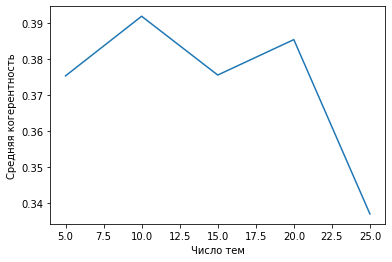

In [22]:
topics_list = [5, 10, 15, 20, 25]
coherences = []

for num in tqdm(topics_list):
    lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=num, chunksize=50, update_every=1, passes=2)
    coherences.append(CoherenceModel(model=lda, texts=data['text'], dictionary=dictionary, coherence='c_v').get_coherence())

plt.plot(topics_list, coherences)
plt.xlabel("Число тем")
plt.ylabel("Средняя когерентность")
plt.show()

In [23]:
lda_10 = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=25, chunksize=50, update_every=1, passes=2)
vis_data = gensimvis.prepare(lda_10, corpus, dictionary)
pyLDAvis.display(vis_data)

/Users/vsarkisyan/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Библиотека BigARTM

Теперь попробуем построить модели с помощью библиотеки BigARTM. [Тут](https://github.com/bigartm/bigartm-book/blob/master/ARTM_example_RU.ipynb) и [тут](https://github.com/bigartm/bigartm-book/blob/master/ARTM_tutorial_RU.ipynb) можно посмотреть на примеры использования библиотеки. 

In [14]:
import artm

Чтобы работать с данными в библиотеке ARTM нужно сперва сделать препроцессинг (мы уже сделали его ранее) и записать данные в [одном из форматов](https://bigartm.readthedocs.io/en/v0.10.1/tutorials/datasets.html), с которыми умеет работать библиотека. Мы конвертируем данные в формат vowpal wabbit:

In [15]:
i = 0
d = data.iloc[i]
d

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


text     [лидер, думский, депутатский, группа, народный, депутат, геннадий, райков, заместитель, председатель, комитет, экология, госдума, сергей, шашурин, призывать, упорядочение, положение, проведение, госполитика, лесной, отрасль, сообщать, прайм, тасс, слово, геннадий, райков, пора, наводить, лесной, отрасль, порядок, сегодня, полный, беспредел, огромный, поток, древесина, бесконтрольно, вывозиться, предел, страна, сырьевой, ресурс, нагло, идти, запад, подставной, зарубежный, фирма, кстати, работать, француз, англичанин, наш, русский, выезжать, страна, оставлять, россия, друг, мимо, государство, утекать, колоссальный, деньги, геннадий, райков, обращать, внимание, отрасль, активно, задействовать, теневой, рынок, соответствовать, криминальный, подоплека, посмотреть, вследствие, варварски, использоваться, наш, лесной, богатство, первый, очередь, карелия, коми, пензенский, область, который, скоро, превращаться, пустыня, сахар, тундра, природа, наводить, ...]
topic    Экономика         

In [18]:
f'doc{i} {" ".join(d.text)} |topic {d.topic}'

'doc0 лидер думский депутатский группа народный депутат геннадий райков заместитель председатель комитет экология госдума сергей шашурин призывать упорядочение положение проведение госполитика лесной отрасль сообщать прайм тасс слово геннадий райков пора наводить лесной отрасль порядок сегодня полный беспредел огромный поток древесина бесконтрольно вывозиться предел страна сырьевой ресурс нагло идти запад подставной зарубежный фирма кстати работать француз англичанин наш русский выезжать страна оставлять россия друг мимо государство утекать колоссальный деньги геннадий райков обращать внимание отрасль активно задействовать теневой рынок соответствовать криминальный подоплека посмотреть вследствие варварски использоваться наш лесной богатство первый очередь карелия коми пензенский область который скоро превращаться пустыня сахар тундра природа наводить порядок отомщать заявлять мнение заместитель председатель комитет экология госдума сергей шашурин группа народный депутат происходить ле

In [19]:
def convert_to_vw_format(index, row):
    return f'doc{index} {" ".join(row.text)} |topic {row.topic}'

In [20]:
with open('lenta_wv.wv', 'w') as f:
    for index, row in data.iterrows():
        vw_string = convert_to_vw_format(index, row)
        f.write(vw_string)
        f.write('\n')

Далее нужно создать объект BatchVectorizer для данных, которые мы записали в формате vowpal wabbit:

In [21]:
batch_vectorizer = artm.BatchVectorizer(data_path='lenta_wv.wv', 
                                        data_format='vowpal_wabbit',
                                        target_folder='lenta_batches')

Попробуем обучить модель LDA для 10 тем:

In [22]:
%%time 
lda = artm.LDA(num_topics=10, alpha=0.1, beta=0.001, 
               cache_theta=True,
               num_document_passes=5, 
               dictionary=batch_vectorizer.dictionary)

lda.fit_offline(batch_vectorizer=batch_vectorizer, 
                num_collection_passes=10)

CPU times: user 31.4 s, sys: 1.5 s, total: 32.9 s
Wall time: 13.1 s


- __fit_offline__ (офлайн алгоритм): много проходов по коллекции, один проход по документу, одно обновление матрицы $\Phi$ в конце прохода по коллекции. __Лучше использовать при работе с небольшой коллекцией__.


- __fit_online__ (онлайн алгоритм) : один проход по коллекции, несколько проходов по документу, несколько обновлений матрицы $\Phi$ в конце прохода по коллекции. __Лучше использовать при работе с большой коллекцией, или коллекцией с часто меняющимеся темами.__



Можем посмотреть на все значения перплексии (для каждой итерации по коллекции из num_collection_passes=10):

In [23]:
lda.perplexity_value

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[49362.97265625,
 4341.3984375,
 3892.7646484375,
 3220.58544921875,
 2745.77978515625,
 2514.556396484375,
 2399.34033203125,
 2331.892333984375,
 2288.51025390625,
 2258.7705078125]

In [24]:
import numpy as np

In [25]:
np.log(lda.perplexity_last_value)

7.722575921140264

Посмотрим на топ-10 токенов для каждой из тем:

In [26]:
top_tokens = lda.get_top_tokens(num_tokens=10)
for i, token_list in enumerate(top_tokens):
     print ('Topic #{0}: {1}'.format(i, token_list))

Topic #0: ['компания', 'процент', 'акция', 'год', 'сша', 'доллар', 'который', 'рынок', 'свой', 'сообщать']
Topic #1: ['год', 'доллар', 'миллион', 'тысяча', 'свой', 'который', 'сообщать', 'это', 'самый', 'клуб']
Topic #2: ['который', 'свой', 'весь', 'это', 'человек', 'время', 'сказать', 'сообщать', 'мочь', 'год']
Topic #3: ['матч', 'первый', 'команда', 'второй', 'сборная', 'чемпионат', 'который', 'турнир', 'свой', 'игра']
Topic #4: ['год', 'доллар', 'россия', 'миллион', 'банк', 'российский', 'суд', 'миллиард', 'долг', 'который']
Topic #5: ['компания', 'россия', 'директор', 'сообщать', 'который', 'это', 'российский', 'президент', 'совет', 'газпром']
Topic #6: ['который', 'год', 'свой', 'это', 'весь', 'команда', 'заявлять', 'сообщать', 'концерт', 'новый']
Topic #7: ['год', 'процент', 'рубль', 'доллар', 'нефть', 'сообщать', 'цена', 'россия', 'составлять', 'это']
Topic #8: ['фильм', 'год', 'режиссер', 'роль', 'который', 'картина', 'фестиваль', 'главный', 'хороший', 'свой']
Topic #9: ['росси

[Более подробный ноутбук про модель LDA](https://github.com/bigartm/bigartm-book/blob/master/LDA_tutorial_RU.ipynb)

Теперь построим базовую модель pLSA:

In [27]:
plsa = artm.ARTM(num_topics=10, 
                 dictionary=batch_vectorizer.dictionary)

Добавим расчет перплексии:

In [28]:
plsa.scores.add(artm.PerplexityScore(name='lenta_perplexity_score',
                 dictionary=batch_vectorizer.dictionary))

И TopTokensScore, чтобы взглянуть на самые вероятные слова в каждой теме:

In [29]:
plsa.scores.add(artm.TopTokensScore(name='TopTokensScore', num_tokens=6))

In [30]:
plsa.fit_offline(batch_vectorizer=batch_vectorizer,
                 num_collection_passes=20)

In [31]:
plsa.score_tracker['lenta_perplexity_score'].value

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[48758.18359375,
 4174.3857421875,
 3477.374755859375,
 2813.667236328125,
 2513.002685546875,
 2381.75830078125,
 2309.6376953125,
 2264.895263671875,
 2234.93359375,
 2213.235107421875,
 2197.0751953125,
 2184.473876953125,
 2174.124755859375,
 2165.2509765625,
 2157.367431640625,
 2150.373291015625,
 2144.125244140625,
 2138.6474609375,
 2133.989990234375,
 2129.965087890625]

In [32]:
for topic_name in plsa.topic_names:
    print (topic_name + ': ', plsa.score_tracker['TopTokensScore'].last_tokens[topic_name])

topic_0:  ['компания', 'процент', 'доллар', 'год', 'сша', 'акция']
topic_1:  ['год', 'музей', 'тысяча', 'который', 'это', 'свой']
topic_2:  ['который', 'свой', 'это', 'человек', 'весь', 'время']
topic_3:  ['матч', 'первый', 'второй', 'команда', 'сборная', 'чемпионат']
topic_4:  ['доллар', 'год', 'россия', 'миллион', 'банк', 'миллиард']
topic_5:  ['компания', 'директор', 'который', 'сообщать', 'акция', 'совет']
topic_6:  ['который', 'свой', 'год', 'команда', 'сезон', 'сообщать']
topic_7:  ['год', 'процент', 'рубль', 'нефть', 'цена', 'составлять']
topic_8:  ['фильм', 'год', 'режиссер', 'роль', 'который', 'фестиваль']
topic_9:  ['россия', 'правительство', 'президент', 'сообщать', 'который', 'проект']


Обраите внимание на слова с заглавной буквы: это поле topic из оригинальных данных.

Попробуем удалить из словаря слишком редкие и слишком частые токены:

In [33]:
batch_vectorizer.dictionary.filter(min_tf=10, max_tf=5000)

artm.Dictionary(name=71a066a1-1c93-4288-b9f0-45eaa0fa2546, num_entries=9955)

In [34]:
plsa = artm.ARTM(num_topics=10, 
                 dictionary=batch_vectorizer.dictionary)
plsa.scores.add(artm.PerplexityScore(name='lenta_perplexity_score',
                dictionary=batch_vectorizer.dictionary))

plsa.scores.add(artm.TopTokensScore(name='TopTokensScore', 
                                    num_tokens=6))
plsa.fit_offline(batch_vectorizer=batch_vectorizer, 
                 num_collection_passes=20)

In [35]:
plsa.score_tracker['lenta_perplexity_score'].value

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[2364.712890625,
 882.1594848632812,
 764.958984375,
 639.6910400390625,
 575.721923828125,
 545.2621459960938,
 528.3995361328125,
 518.3604125976562,
 512.1565551757812,
 508.26861572265625,
 505.6434326171875,
 503.74127197265625,
 502.3025817871094,
 501.17230224609375,
 500.2276916503906,
 499.3944091796875,
 498.6504821777344,
 497.98919677734375,
 497.39599609375,
 496.8677062988281]

Стало заметно лучше :)

In [36]:
for topic_name in plsa.topic_names:
    print (topic_name + ': ', plsa.score_tracker['TopTokensScore'].last_tokens[topic_name])

topic_0:  ['процент', 'компания', 'составлять', 'сша', 'рынок', 'рост']
topic_1:  ['матч', 'команда', 'клуб', 'сборная', 'минута', 'чемпионат']
topic_2:  ['роль', 'режиссер', 'актер', 'главный', 'the', 'новый']
topic_3:  ['первый', 'второй', 'турнир', 'место', 'российский', 'матч']
topic_4:  ['российский', 'миллион', 'миллиард', 'банк', 'страна', 'долг']
topic_5:  ['компания', 'директор', 'суд', 'предприятие', 'акция', 'газпром']
topic_6:  ['нефть', 'заявлять', 'баррель', 'решение', 'страна', 'опек']
topic_7:  ['рубль', 'правительство', 'процент', 'бюджет', 'налог', 'закон']
topic_8:  ['фестиваль', 'театр', 'премия', 'российский', 'москва', 'известный']
topic_9:  ['город', 'тысяча', 'музей', 'передавать', 'время', 'весь']


__Мультимодальные модели__

В библиотеке ARTM можно обучать мультимодальные модели, например, давайте попробуем обучить модель, которая будет учитывать поле topic из наших данных (мы специально записали его отдельно через | )

In [37]:
# описываем модель и задаем веса классов
martm = artm.ARTM(num_topics=20,
                  class_ids={'@default_class': 1.0, '@topic': 5.0}, 
                  dictionary=batch_vectorizer.dictionary)

Добавим расчет метрик и регуляризаторы:

In [38]:
martm.scores.add(artm.SparsityPhiScore(name='sparsity_phi_score',
                                       class_id='@topic'))

martm.scores.add(artm.TopTokensScore(name='TopTokensScore',
                                     num_tokens=6))


martm.scores.add(artm.PerplexityScore(name='lenta_perplexity_score',
                dictionary=batch_vectorizer.dictionary))

martm.regularizers.add(artm.DecorrelatorPhiRegularizer(name='decorrelator_phi_def',
                    class_ids=['@default_class']))

martm.regularizers.add(artm.DecorrelatorPhiRegularizer(name='decorrelator_phi_lab',
                        class_ids=['@topic']))

In [39]:
martm.fit_offline(batch_vectorizer=batch_vectorizer, 
                  num_collection_passes=10)

In [40]:
martm.score_tracker['lenta_perplexity_score'].value

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[2497.26416015625,
 903.12841796875,
 725.1441650390625,
 590.8660888671875,
 536.111328125,
 508.2986145019531,
 491.1819763183594,
 479.7178955078125,
 471.7260437011719,
 465.9300842285156]

In [41]:
for topic_name in martm.topic_names:
    print (topic_name + ': ', martm.score_tracker['TopTokensScore'].last_tokens[topic_name])

topic_0:  ['компания', 'акция', 'процент', 'рынок', 'курс', 'составлять']
topic_1:  ['клуб', 'команда', 'сборная', 'матч', 'чемпионат', 'тренер']
topic_2:  ['группа', 'песня', 'the', 'весь', 'человек', 'концерт']
topic_3:  ['сезон', 'ассоциация', 'мир', 'весь', 'команда', 'чемпион']
topic_4:  ['миллиард', 'банк', 'миллион', 'долг', 'российский', 'сумма']
topic_5:  ['москва', 'премия', 'российский', 'фестиваль', 'московский', 'александр']
topic_6:  ['заявлять', 'дело', 'суд', 'решение', 'новый', 'деньги']
topic_7:  ['правительство', 'закон', 'бюджет', 'налог', 'федеральный', 'также']
topic_8:  ['театр', 'известный', 'картина', 'художник', 'выставка', 'весь']
topic_9:  ['музей', 'президент', 'передавать', 'век', 'работа', 'самый']
topic_10:  ['компания', 'предприятие', 'акция', 'рао', 'директор', 'завод']
topic_11:  ['сша', 'страна', 'американский', 'евро', 'экономика', 'экономический']
topic_12:  ['роль', 'сыграть', 'режиссер', 'съемка', 'главный', 'сценарий']
topic_13:  ['режиссер', 'х

Сравним обычную модель pLSA и модель mARTM:

In [42]:
model_plsa = artm.ARTM(topic_names=['topic_{}'.format(i) for i in range(20)],
                       scores=[artm.PerplexityScore(name='PerplexityScore',
                       dictionary=batch_vectorizer.dictionary)],
                       cache_theta=True)

model_martm = artm.ARTM(topic_names=['topic_{}'.format(i) for i in range(20)],
                       scores=[artm.PerplexityScore(name='PerplexityScore',
                       dictionary=batch_vectorizer.dictionary)],
                       regularizers=[artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.15)],
                       cache_theta=True,
                        class_ids={'@default_class': 1.0, '@topic': 5.0}, 
                  dictionary=batch_vectorizer.dictionary)

In [43]:
model_martm.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore'))
model_martm.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore'))

model_plsa.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore'))
model_plsa.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore'))

In [44]:
model_plsa.initialize(dictionary=batch_vectorizer.dictionary)
model_martm.initialize(dictionary=batch_vectorizer.dictionary)

In [45]:
model_martm.num_document_passes = 1
model_plsa.num_document_passes = 1

model_martm.fit_offline(batch_vectorizer=batch_vectorizer, 
                        num_collection_passes=20)
model_plsa.fit_offline(batch_vectorizer=batch_vectorizer,
                       num_collection_passes=20)

/opt/conda/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Perplexity: 555.287 (pLSA) vs. 584.436 (mARTM)


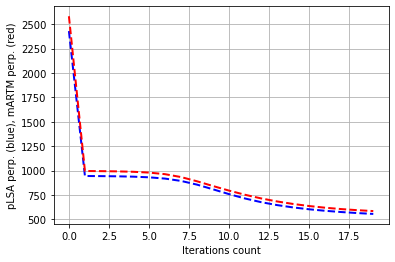

In [46]:
import matplotlib.pyplot as plt

def print_measures(model_plsa, model_martm):

    print ('Perplexity: {0:.3f} (pLSA) vs. {1:.3f} (mARTM)'.format(
        model_plsa.score_tracker['PerplexityScore'].last_value,
        model_martm.score_tracker['PerplexityScore'].last_value))

    plt.plot(range(model_plsa.num_phi_updates), model_plsa.score_tracker['PerplexityScore'].value, 'b--',
             range(model_martm.num_phi_updates), model_martm.score_tracker['PerplexityScore'].value, 'r--', linewidth=2)
    
    plt.xlabel('Iterations count')
    plt.ylabel('pLSA perp. (blue), mARTM perp. (red)')
    plt.grid(True)
    plt.show()
    
print_measures(model_plsa, model_martm)